In [18]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

%matplotlib inline

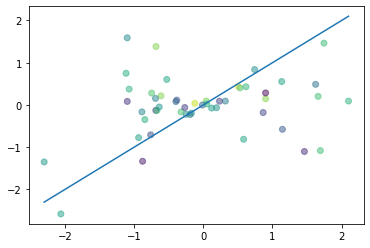

In [19]:

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Just make the colors cool for fun
colors = np.random.randn(n)

plt.plot(np.unique(x),np.poly1d(np.polyfit(x, x, 1))(np.unique(x)))

plt.scatter(x,y,c=colors,alpha=0.5)
plt.show()

In [20]:
x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype = np.float32)
x_train = x_train.reshape(-1,1)

In [21]:
y_train = [2*i+1 for i in x_values]
y_train = np.array(y_train,dtype = np.float32)
y_train = y_train.reshape(-1,1)

In [22]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)

In [23]:
# Initialize the Linear Regression class
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [24]:
# Set up the loss and optimizer functions
loss_criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [26]:
epochs=100

# Training loop
for epoch in range(epochs):
    epoch += 1

    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward regression step
    output = model(inputs)

    # Calculate loss
    loss = loss_criterion(output,labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch,loss.item()))

epoch 1, loss 13.885990142822266
epoch 2, loss 1.1408710479736328
epoch 3, loss 0.10119982063770294
epoch 4, loss 0.016306072473526
epoch 5, loss 0.00929163582623005
epoch 6, loss 0.008630584925413132
epoch 7, loss 0.008488751016557217
epoch 8, loss 0.008390276692807674
epoch 9, loss 0.00829626526683569
epoch 10, loss 0.008203619159758091
epoch 11, loss 0.008112024515867233
epoch 12, loss 0.008021462708711624
epoch 13, loss 0.007931842468678951
epoch 14, loss 0.007843240164220333
epoch 15, loss 0.007755691185593605
epoch 16, loss 0.007669070269912481
epoch 17, loss 0.007583420258015394
epoch 18, loss 0.007498804945498705
epoch 19, loss 0.007415014319121838
epoch 20, loss 0.007332201581448317
epoch 21, loss 0.007250327151268721
epoch 22, loss 0.007169370539486408
epoch 23, loss 0.007089328486472368
epoch 24, loss 0.007010168861597776
epoch 25, loss 0.0069318716414272785
epoch 26, loss 0.006854477804154158
epoch 27, loss 0.006777921225875616
epoch 28, loss 0.00670224241912365
epoch 29, l

In [27]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.8983519],
       [ 2.91299  ],
       [ 4.9276285],
       [ 6.9422665],
       [ 8.956904 ],
       [10.971542 ],
       [12.986181 ],
       [15.000819 ],
       [17.015457 ],
       [19.030096 ],
       [21.044733 ]], dtype=float32)

In [28]:
# Save model
save_model = False
if save_model is True:
    torch.save(model.load_dict(),'model.pkl')

In [29]:
# Load model
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

In [30]:
# Building model for GPU
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 164.38446044921875
epoch 2, loss 13.723111152648926
epoch 3, loss 1.430625557899475
epoch 4, loss 0.4244890511035919
epoch 5, loss 0.3389849364757538
epoch 6, loss 0.32861196994781494
epoch 7, loss 0.32440489530563354
epoch 8, loss 0.32073861360549927
epoch 9, loss 0.31715309619903564
epoch 10, loss 0.3136114776134491
epoch 11, loss 0.31010937690734863
epoch 12, loss 0.30664631724357605
epoch 13, loss 0.3032219707965851
epoch 14, loss 0.29983586072921753
epoch 15, loss 0.2964876890182495
epoch 16, loss 0.2931767404079437
epoch 17, loss 0.28990328311920166
epoch 18, loss 0.28666555881500244
epoch 19, loss 0.2834647595882416
epoch 20, loss 0.28029900789260864
epoch 21, loss 0.27716925740242004
epoch 22, loss 0.27407410740852356
epoch 23, loss 0.27101361751556396
epoch 24, loss 0.267986923456192
epoch 25, loss 0.2649945020675659
epoch 26, loss 0.26203545928001404
epoch 27, loss 0.2591092884540558
epoch 28, loss 0.2562156915664673
epoch 29, loss 0.2533548176288605
epoch 30, l